# DSP - Sampling Exercise
***
**Federal University of Campina Grande (Universidade Federal de Campina Grande)**

Author: **João Pedro Melquiades Gomes**

Email: **joao.melquiades@ee.ufcg.edu.br**
***

## Generating the signal
***
This entire exercise will use the following signal:

<center>$x(t) = cos(2\pi3200t) + 0.5cos(2\pi600t) + 0.01cos(2\pi300t)$</center>

I will assume that noise corrupted the signal, just to apply the anti-aliasing filter before sampling

First, we have three frequency components in this signal: $f_1 = 300Hz$, $f_2 = 600Hz$ and $f_3 = 3200Hz$. Thus, the Fourier transform will be three impulse pairs centered in 0 and located at $\pm f_1, \pm f_2$ and $\pm f_3$. Once we are simulating an analogic signal in digital world, the representation will not be exactly three impulses, and there will be a lot of noise because we are adding it. So, let's code.

In [3]:
# Important imports
import numpy as np
from scipy.fft import fft, ifft, fftshift, ifftshift, fftfreq
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate
sns.set_theme()

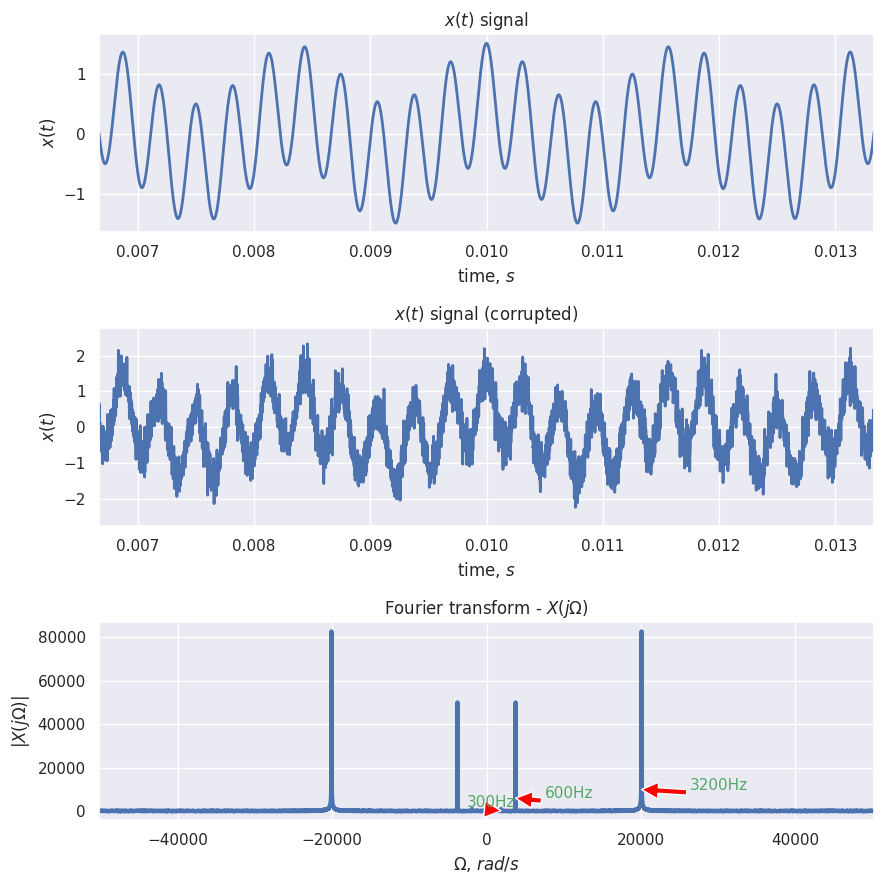

In [4]:
# Let's save 100 periods of the fundamental frequency of signal

f_1 = 300 #Hz
f_2 = 600 #Hz
f_x = 3200 #Hz

# This doesn't make sense, it is only to simulate the analogic signal, but in fact it is a digital
# one with this sampling frequency
analog_fs = 600000

t = np.arange(0, 100*1/f_1, 1/analog_fs)

# signal declaration
xt = np.cos(2*np.pi*f_x*t) + 0.5*np.cos(2*np.pi*f_2*t) + 0.01*np.cos(2*np.pi*f_1*t)

#Let's add some noise to make things more interesting
noise = np.random.normal(0,0.3,t.size)#0.1*np.cos(2*np.pi*2*f_x*t) + 0.1*np.cos(2*np.pi*2.2*f_x*t) + 0.1*np.cos(2*np.pi*2.3*f_x*t)


plt.figure(figsize=(9,9))


# Time domain
plt.subplot(3,1,1)
plt.plot(t, xt, linewidth=2)
plt.title("$x(t)$ signal")
plt.xlabel("time, $s$")
plt.ylabel("$x(t)$")
# Only shows two periods
plt.xlim(2/f_1, 4/f_1)


plt.subplot(3,1,2)
plt.plot(t, xt + noise, linewidth=2)
plt.title("$x(t)$ signal (corrupted)")
plt.xlabel("time, $s$")
plt.ylabel("$x(t)$")
# Only shows two periods
plt.xlim(2/f_1, 4/f_1)

# Frequency domain

plt.subplot(3,1,3)

# The fftshift centers the representation in 0, and we can observe
# how the analogic fourier transform should be. Also, the DFT range is
# -2pi to 2pi. In fact, this is a discret fourier transform. I am converting
# the frequency axis from rad to Hz to show the representation of analogic
# fourier transform

Xf = fftshift(fft(xt + noise))
f = fftshift(fftfreq(t.size, t[1]-t[0]))
w = 2*np.pi*f
plt.plot(w, np.abs(Xf), linewidth=3)
plt.grid("on", which="both")
plt.xlim(-2.5*2*np.pi*f_x, 2.5*2*np.pi*f_x)
plt.title("Fourier transform - $X(j\Omega)$")
plt.xlabel("$\Omega$, $rad/s$")
plt.ylabel("$|X(j\Omega)|$")


plt.annotate('300Hz', xy = (300*2*np.pi, 200), 
             fontsize = 11, xytext = (-400*2*np.pi, 2000), 
             arrowprops = dict(facecolor = 'red'),
             color = 'g')
plt.annotate('600Hz', xy = (600*2*np.pi, 6000), 
             fontsize = 11, xytext = (1200*2*np.pi, 6100), 
             arrowprops = dict(facecolor = 'red'),
             color = 'g')
plt.annotate('3200Hz', xy = (3200*2*np.pi, 10000), 
             fontsize = 11, xytext = (4200*2*np.pi, 10000), 
             arrowprops = dict(facecolor = 'red'),
             color = 'g')

plt.tight_layout()
plt.show()



## Anti-aliasing filter

In order to eliminate the unwanted frequencies, we must apply a low-pass filter in $x(t)$. This is done to attenuate the frequencies that are bigger than the maximum frequency that we are interested. So, here I will implement a second-order Low-pass filter with cut-frequency $f_c = 3.2kHz$



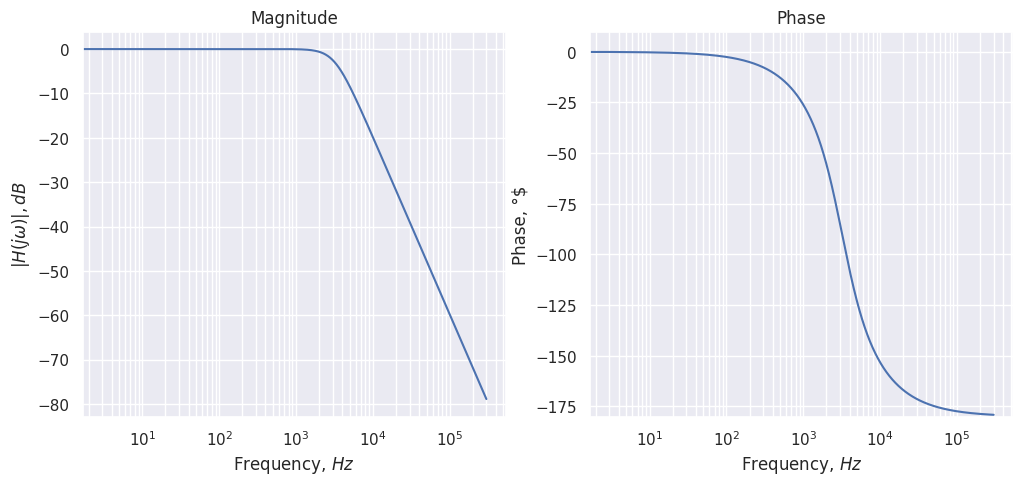

In [5]:
w_c = 2*np.pi*f_x
aa_filter = w_c**2 / ((w_c**2 - (2*np.pi*f)**2) +1j*np.sqrt(2)*w_c*2*np.pi*f)

# The bode diagram
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title('Magnitude')
plt.xlabel('Frequency, $Hz$')
plt.ylabel('$|H(j\omega)|, dB$')
plt.semilogx(f, 20*np.log10(np.abs(aa_filter)))
plt.grid('on', which='both')
plt.subplot(1, 2, 2)
plt.title('Phase')
plt.xlabel('Frequency, $Hz$')
plt.ylabel('Phase, °$')
plt.semilogx(f, np.angle(aa_filter)*180/np.pi)
plt.ylim(-180, 10)
plt.grid('on', which='both')
plt.show()

/home/joao/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


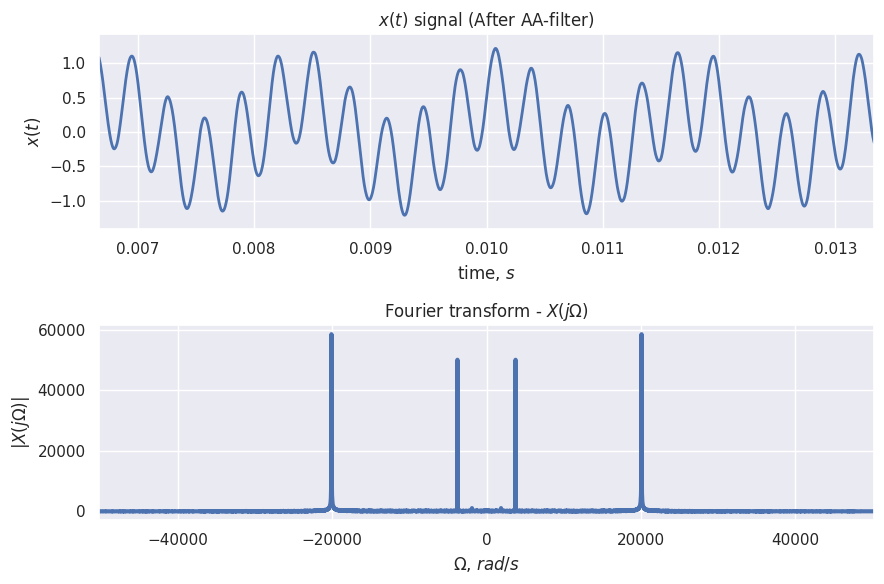

In [6]:
#Now, let's multiply this filter by x(t), resulting in the filtered signal

Xf_filtered = Xf*aa_filter
xt_filtered = ifft(ifftshift(Xf_filtered))

plt.figure(figsize=(9,6))



plt.subplot(2,1,1)
plt.plot(t, xt_filtered, linewidth=2)
plt.title("$x(t)$ signal (After AA-filter)")
plt.xlabel("time, $s$")
plt.ylabel("$x(t)$")
# Only shows two periods
plt.xlim(2/f_1, 4/f_1)

# Frequency domain

plt.subplot(2,1,2)


plt.plot(w, np.abs(Xf_filtered), linewidth=3)
plt.grid("on", which="both")
plt.xlim(-2.5*2*np.pi*f_x, 2.5*2*np.pi*f_x)
plt.title("Fourier transform - $X(j\Omega)$")
plt.xlabel("$\Omega$, $rad/s$")
plt.ylabel("$|X(j\Omega)|$")

plt.tight_layout()
plt.show()


We can observe that the higher frequencies now are attenuated. The noise is interfering much less than before

## Sampling the signal
***

When we sample the signal, we create multiple copies of the spectrum response along the frequency axis. These copies are centered in multiples of sampling frequency ($f_s$). Because of that, if the sampling frequency is to low, two or more copies of the spectrum will collide, causing aliasing and turning impossible to recover the signal. This is a summary of the reason why we use the Nyquist theorem:

<center>$f_s \ge 2f_x$</center>

So, the maximum frequency component of $x(t)$ is $f_x = 3.2kHz$. We must use a sampling frequency of more than $6.4ksps$. Here, I am using a bigger value, $20ksps$.

Here, we will simulate the sampling by sample-hold scheme.

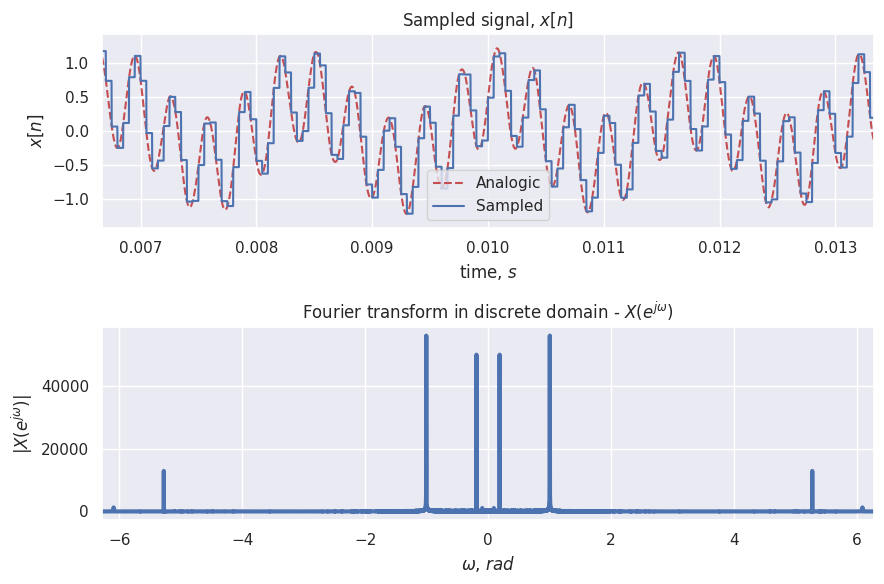

In [7]:
f_s = 20e3 # sps

# Defining sampling arrays
xn = np.zeros(t.size)

# Sampling
for i in range(xn.size):
    if(i%((analog_fs)/f_s) == 0):
        xn[i] = xt_filtered.real[i]
    else:
        xn[i] = xn[i-1]
       

plt.figure(figsize=(9,6))
plt.subplot(2,1,1)
plt.plot(t, xt_filtered, '--r')
plt.plot(t, xn)
plt.title("Sampled signal, $x[n]$")
plt.xlabel("time, $s$")
plt.ylabel("$x[n]$")
plt.legend(['Analogic', 'Sampled'])
# Only shows two periods
plt.xlim(2/f_1, 4/f_1)

# Frequency domain
plt.subplot(2,1,2)

Xf_sampled = fftshift(fft(xn, t.size))
f_sampled = fftshift(fftfreq(t.size, t[1]-t[0]))

plt.plot(f_sampled*2*np.pi/f_s, np.abs(Xf_sampled), linewidth=3)
plt.grid("on", which="both")
plt.title("Fourier transform in discrete domain - $X(e^{j\omega})$")
plt.xlabel("$\omega$, $rad$")
plt.ylabel("$|X(e^{j\omega})|$")
plt.xlim(-2*np.pi, 2*np.pi)

plt.tight_layout()
plt.show()

The FFT will always generate a spectrum that inside the interval $[-\pi, \pi]$, or, in terms of sampling frequency $[-\frac{f_s}{2}, \frac{f_s}{2}]$. In this case, the sampling frequency considered is the "analogic f_s" declared in first cells ($600ksps$). Because of this we can see more tha none copy of spectrum. Once the Nyquist theorem was respected, there is no aliasing.

***
## Recovering
***

Here, we will first see the recovering with $f_s = 20ksps$, then we will re-sample the original signal using $f_s/2$ and $f_s/4$ to check the effects of aliasing. 

In order to recover the signal, we just have to pass another low-pass filter. The cut frequency this time will be $f_s/2$, because this is where the signal starts to repeat.

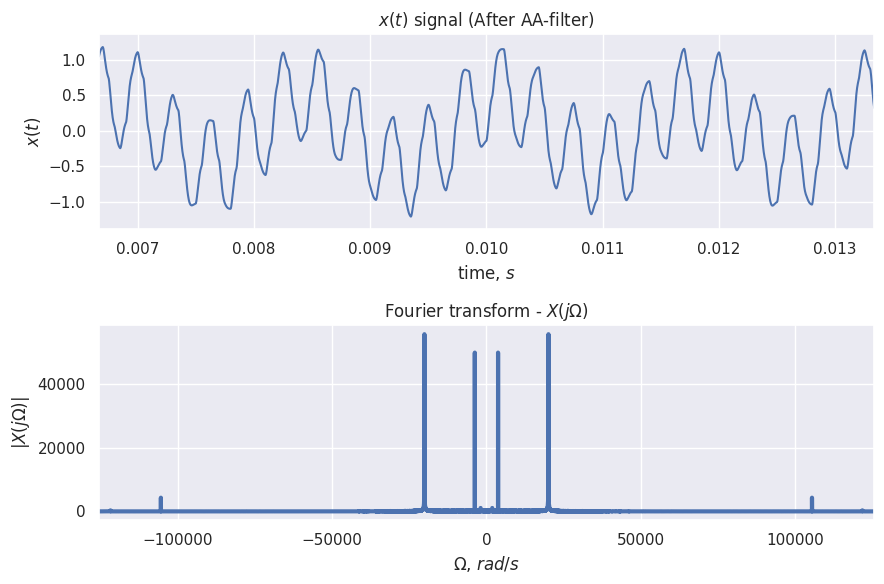

In [8]:
w_c = 2*np.pi*f_s/2
rec_filter = w_c**2 / ((w_c**2 - (2*np.pi*f_sampled)**2) +1j*np.sqrt(2)*w_c*2*np.pi*f_sampled)


Xf_rec = Xf_sampled*rec_filter
xt_rec = ifft(ifftshift(Xf_rec))

plt.figure(figsize=(9,6))

# # Interpolating the signal to show full recovered signal
# f = interpolate.interp1d(t_sampled, xt_rec, kind='cubic')
# xt_new = f(t[0:30000])


plt.subplot(2,1,1)
plt.plot(t, xt_rec)
plt.title("$x(t)$ signal (After AA-filter)")
plt.xlabel("time, $s$")
plt.ylabel("$x(t)$")
# Only shows two periods
plt.xlim(2/f_1, 4/f_1)

# Frequency domain

plt.subplot(2,1,2)

plt.plot(w, np.abs(Xf_rec), linewidth=3)
plt.grid("on", which="both")
plt.xlim(-2*np.pi*f_s, 2*np.pi*f_s)
plt.title("Fourier transform - $X(j\Omega)$")
plt.xlabel("$\Omega$, $rad/s$")
plt.ylabel("$|X(j\Omega)|$")

plt.tight_layout()
plt.show()



We can observe that the signal was recovered. It is not perfect (The low-pass filter isn't ideal), but it was possible to keep the spectrum of the signal intact. Let's see with $f_s = 10ksps$

### With $f_s = f_s/2$

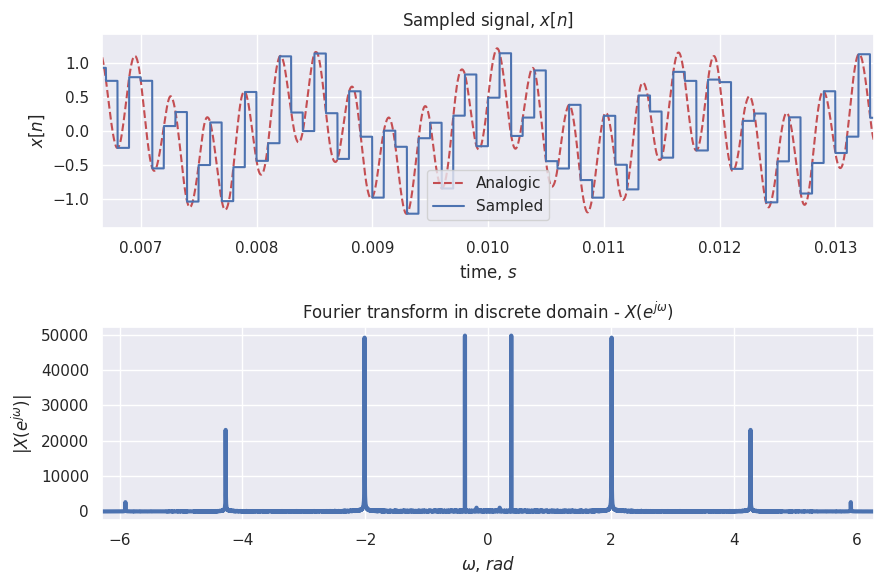

In [9]:
f_s = 10e3 # sps

# Defining sampling arrays
# t_sampled = np.arange(0, 100/f_1, 1/f_s)
xn = np.zeros(t.size)

# Sampling
for i in range(xn.size):
    if(i%((analog_fs)/f_s) == 0):
        xn[i] = xt_filtered.real[i]
    else:
        xn[i] = xn[i-1]
plt.figure(figsize=(9,6))


plt.subplot(2,1,1)
plt.plot(t, xt_filtered, '--r')
plt.plot(t, xn)
plt.title("Sampled signal, $x[n]$")
plt.xlabel("time, $s$")
plt.ylabel("$x[n]$")
plt.legend(['Analogic', 'Sampled'])
# Only shows two periods
plt.xlim(2/f_1, 4/f_1)

# Frequency domain


# zero-padding
padded_xn = np.zeros(t.size)
for i in range(0, xn.size):
    padded_xn[i] = xn[i]

# Frequency domain
plt.subplot(2,1,2)

Xf_sampled = fftshift(fft(xn, t.size))
f_sampled = fftshift(fftfreq(t.size, t[1]-t[0]))

plt.plot(f_sampled*2*np.pi/f_s, np.abs(Xf_sampled), linewidth=3)
plt.grid("on", which="both")
plt.title("Fourier transform in discrete domain - $X(e^{j\omega})$")
plt.xlabel("$\omega$, $rad$")
plt.ylabel("$|X(e^{j\omega})|$")
plt.xlim(-2*np.pi, 2*np.pi)

plt.tight_layout()
plt.show()

The aliasing isn't present. The maximum component is at $3200f_s/(2\pi) = 2.01$

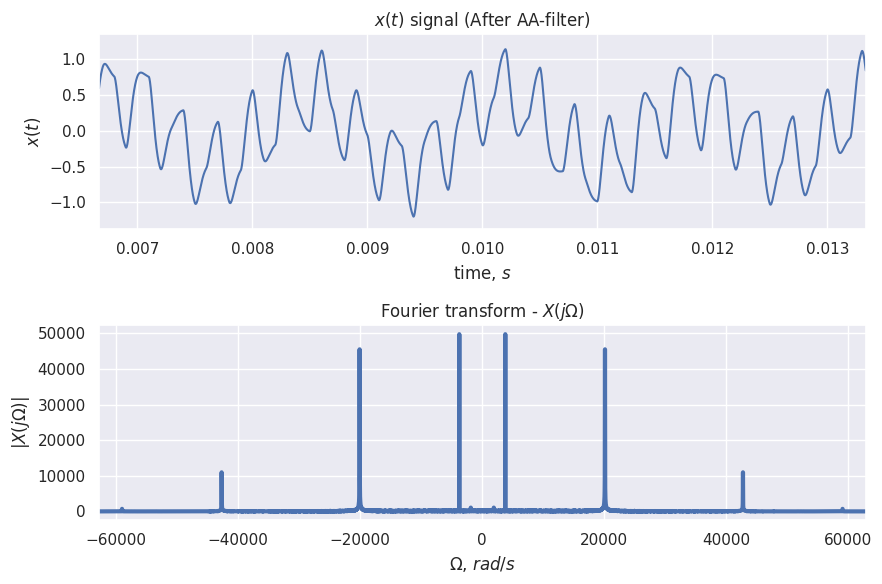

In [10]:
w_c = 2*np.pi*f_s/2
rec_filter = w_c**2 / ((w_c**2 - (2*np.pi*f_sampled)**2) +1j*np.sqrt(2)*w_c*2*np.pi*f_sampled)

Xf_rec = Xf_sampled*rec_filter
xt_rec = ifft(ifftshift(Xf_rec))

plt.figure(figsize=(9,6))

# # Interpolating the signal to show full recovered signal
# f = interpolate.interp1d(t_sampled, xt_rec, kind='cubic')
# xt_new = f(t[0:30000])


plt.subplot(2,1,1)
plt.plot(t, xt_rec)
plt.title("$x(t)$ signal (After AA-filter)")
plt.xlabel("time, $s$")
plt.ylabel("$x(t)$")
# Only shows two periods
plt.xlim(2/f_1, 4/f_1)

# Frequency domain

plt.subplot(2,1,2)

plt.plot(w, np.abs(Xf_rec), linewidth=3)
plt.grid("on", which="both")
plt.xlim(-2*np.pi*f_s, 2*np.pi*f_s)
plt.title("Fourier transform - $X(j\Omega)$")
plt.xlabel("$\Omega$, $rad/s$")
plt.ylabel("$|X(j\Omega)|$")

plt.tight_layout()
plt.show()




The signal is poorly recovered because of the nature of filter. If the filter was ideal, the recovering would be perfect, because there is no aliasing.

### With $f_s = f_s/4$

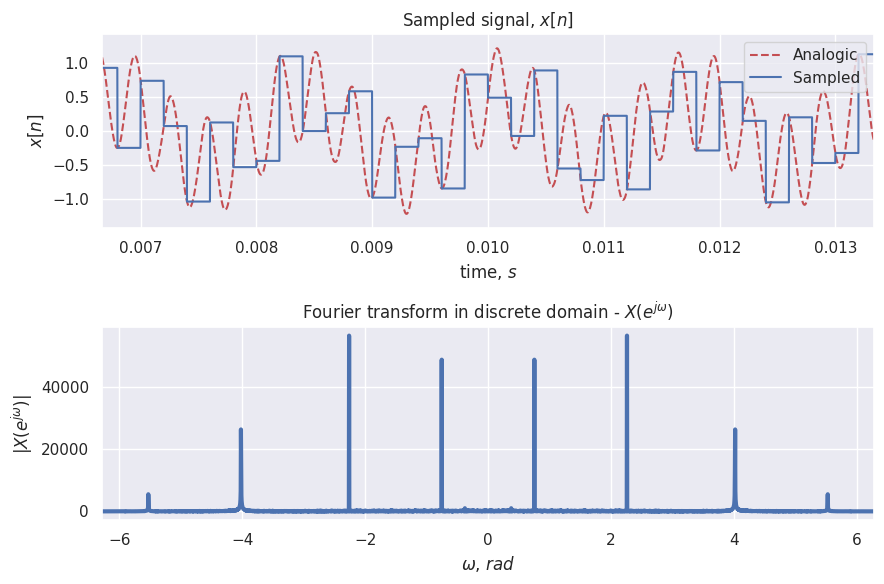

In [11]:
f_s = 5e3 # sps

# Defining sampling arrays
# t_sampled = np.arange(0, 100/f_1, 1/f_s)
xn = np.zeros(t.size)

# Sampling
for i in range(xn.size):
    if(i%((analog_fs)/f_s) == 0):
        xn[i] = xt_filtered.real[i]
    else:
        xn[i] = xn[i-1]
plt.figure(figsize=(9,6))


plt.subplot(2,1,1)
plt.plot(t, xt_filtered, '--r')
plt.plot(t, xn)
plt.title("Sampled signal, $x[n]$")
plt.xlabel("time, $s$")
plt.ylabel("$x[n]$")
plt.legend(['Analogic', 'Sampled'])
# Only shows two periods
plt.xlim(2/f_1, 4/f_1)

# Frequency domain

plt.subplot(2,1,2)

Xf_sampled = fftshift(fft(xn, t.size))
f_sampled = fftshift(fftfreq(t.size, t[1]-t[0]))

plt.plot(f_sampled*2*np.pi/f_s, np.abs(Xf_sampled), linewidth=3)
plt.grid("on", which="both")
plt.title("Fourier transform in discrete domain - $X(e^{j\omega})$")
plt.xlabel("$\omega$, $rad$")
plt.ylabel("$|X(e^{j\omega})|$")
plt.xlim(-2*np.pi, 2*np.pi)

plt.tight_layout()
plt.show()

The aliasing is present. The maximum component is at $3200f_s/(2\pi) = 4.02$. It is in adjacent image.

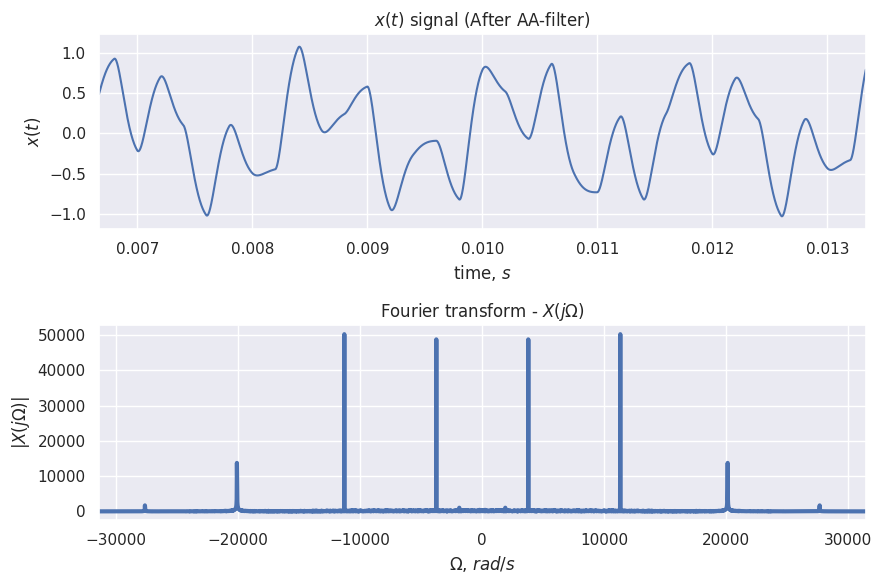

In [12]:
w_c = 2*np.pi*f_s/2
rec_filter = w_c**2 / ((w_c**2 - (2*np.pi*f_sampled)**2) +1j*np.sqrt(2)*w_c*2*np.pi*f_sampled)



Xf_rec = Xf_sampled*rec_filter
xt_rec = ifft(ifftshift(Xf_rec))

plt.figure(figsize=(9,6))

# # Interpolating the signal to show full recovered signal
# f = interpolate.interp1d(t_sampled, xt_rec, kind='cubic')
# xt_new = f(t[0:30000])


plt.subplot(2,1,1)
plt.plot(t, xt_rec)
plt.title("$x(t)$ signal (After AA-filter)")
plt.xlabel("time, $s$")
plt.ylabel("$x(t)$")
# Only shows two periods
plt.xlim(2/f_1, 4/f_1)

# Frequency domain

plt.subplot(2,1,2)

plt.plot(w, np.abs(Xf_rec), linewidth=3)
plt.grid("on", which="both")
plt.xlim(-2*np.pi*f_s, 2*np.pi*f_s)
plt.title("Fourier transform - $X(j\Omega)$")
plt.xlabel("$\Omega$, $rad/s$")
plt.ylabel("$|X(j\Omega)|$")

plt.tight_layout()
plt.show()


We can see that the signal now have frequencies that wasn't present in original one. The signal was destroyed and cannot be recovered because of the aliasing.

## Decimation

Decimation is the process of removing samples of signal. We do this by calculating:

<center>$x_d(n) = x(Ln)$</center>

To this exercise, we will utilizate $f_s = 6ksps$. First, let's re-sample $x(t)$ with this sampling frequency

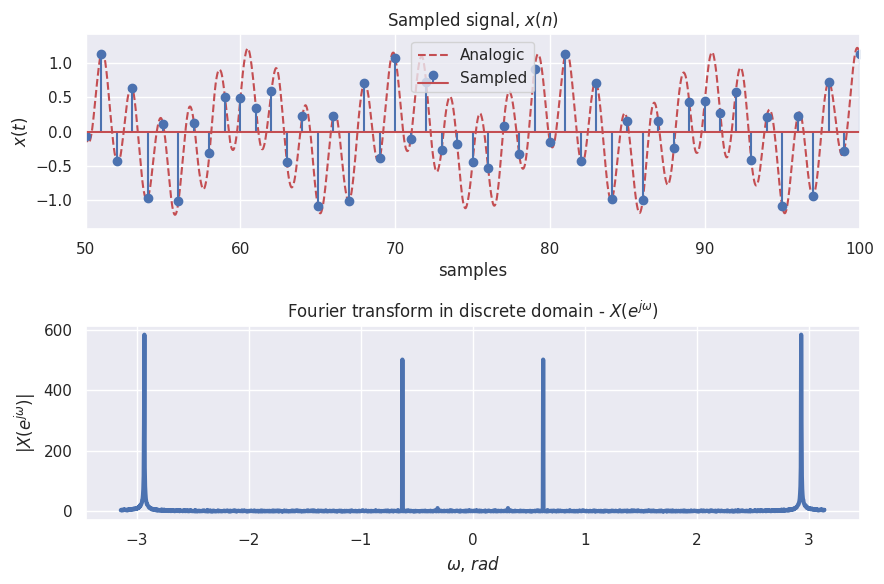

In [13]:
f_s = 6e3 # sps

# Defining sampling arrays
t_sampled = np.arange(0, t.size/(analog_fs/f_s))
xn = np.zeros(t_sampled.size)

# Sampling
for i in range(xn.size):
    xn[i] = xt_filtered.real[int(i*analog_fs/f_s)]
plt.figure(figsize=(9,6))


plt.subplot(2,1,1)
plt.plot(t*f_s, xt_filtered, '--r')
plt.stem(t_sampled, xn)
plt.title("Sampled signal, $x(n)$")
plt.xlabel("samples")
plt.ylabel("$x(t)$")
plt.legend(['Analogic', 'Sampled'])
# Only shows two periods
plt.xlim(50, 100)

# Frequency domain


# zero-padding
padded_xn = np.zeros(t.size)
for i in range(0, xn.size):
    padded_xn[i] = xn[i]


plt.subplot(2,1,2)

Xf_sampled = fftshift(fft(xn))
f_sampled = fftshift(fftfreq(t_sampled.size, 1/f_s))

plt.plot(f_sampled*2*np.pi/f_s, np.abs(Xf_sampled), linewidth=3)
plt.grid("on", which="both")
# plt.xlim(-f_s/2, f_s/2)
plt.title("Fourier transform in discrete domain - $X(e^{j\omega})$")
plt.xlabel("$\omega$, $rad$")
plt.ylabel("$|X(e^{j\omega})|$")

plt.tight_layout()
plt.show()

We already can see that the signal has aliasing. The maximum component should be at $\omega = 3.35rad$. But it is greather than $\pi$. So the component that we see next to $3rad$ is the max component of adjacent image.

### $L = 2$

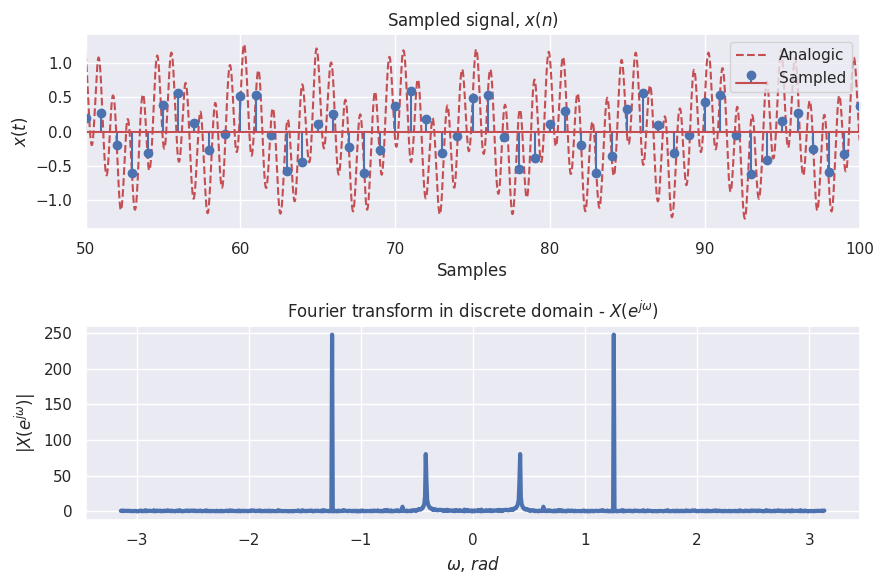

In [14]:
L = 2

# Low-pass filter
w_c = 2*np.pi*f_s/(2*L)
filt = w_c**2 / ((w_c**2 - (2*np.pi*f_sampled)**2) +1j*np.sqrt(2)*w_c*2*np.pi*f_sampled)

Xf_filt = Xf_sampled*filt
xn_filt = ifft(ifftshift(Xf_filt))

# Defining sampling arrays
t_decimated = np.arange(0, int(t_sampled.size/L))
x_decimated = np.zeros(t_decimated.size)

# Sampling
for i in range(x_decimated.size):
    x_decimated[i] = xn_filt.real[int(i*L)]
#     t_decimated[i] = t_sampled[int(i*L)]
plt.figure(figsize=(9,6))


plt.subplot(2,1,1)
plt.plot(t*f_s/L, xt_filtered, '--r')
plt.stem(t_decimated, x_decimated)
plt.title("Sampled signal, $x(n)$")
plt.xlabel("Samples")
plt.ylabel("$x(t)$")
plt.legend(['Analogic', 'Sampled'])
# Only shows two periods
plt.xlim(50, 100)

# Frequency domain

plt.subplot(2,1,2)

Xf_decimated = fftshift(fft(x_decimated))
f_decimated = fftshift(fftfreq(t_decimated.size, 1/f_s))

plt.plot(f_decimated*2*np.pi/f_s, np.abs(Xf_decimated), linewidth=3)
plt.grid("on", which="both")
# plt.xlim(-2*f_s/2, 2*f_s/2)
plt.title("Fourier transform in discrete domain - $X(e^{j\omega})$")
plt.xlabel("$\omega$, $rad$")
plt.ylabel("$|X(e^{j\omega})|$")

plt.tight_layout()
plt.show()


The signal was modified after decimation. If we try to recover this signal, we will obtain another very different than the $x(t)$ declared in first cells. If the low-pass filter was ideal, the component next to 0 wouldn't be there. This component is the maximum component of the adjacent image

### $L = 5$ 

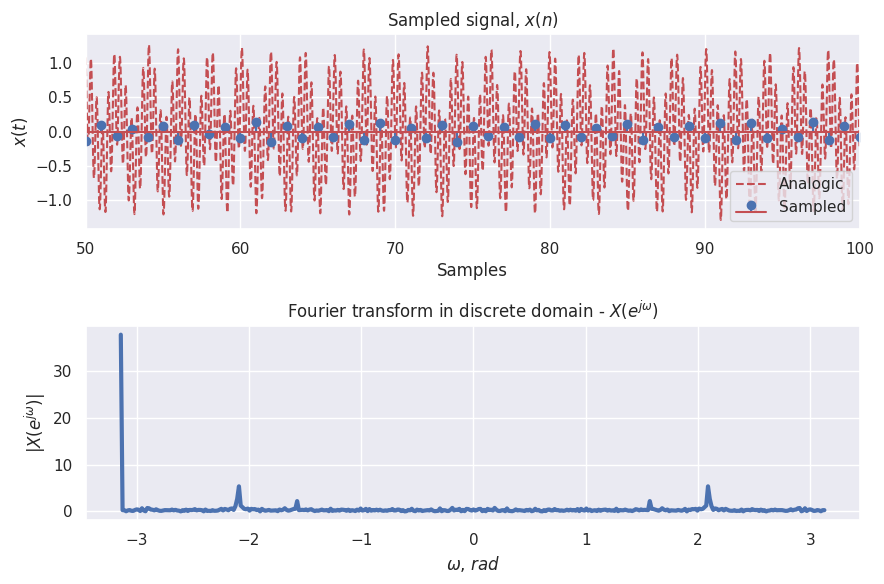

In [15]:
L = 5
# Low-pass filter
w_c = 2*np.pi*f_s/(2*L)
filt = w_c**2 / ((w_c**2 - (2*np.pi*f_sampled)**2) +1j*np.sqrt(2)*w_c*2*np.pi*f_sampled)

Xf_filt = Xf_sampled*filt
xn_filt = ifft(ifftshift(Xf_filt))

# Defining sampling arrays
t_decimated = np.arange(0, int(t_sampled.size/L))
x_decimated = np.zeros(t_decimated.size)

# Sampling
for i in range(x_decimated.size):
    x_decimated[i] = xn_filt.real[int(i*L)]
#     t_decimated[i] = t_sampled[int(i*L)]
plt.figure(figsize=(9,6))


plt.subplot(2,1,1)
plt.plot(t*f_s/L, xt_filtered, '--r')
plt.stem(t_decimated, x_decimated)
plt.title("Sampled signal, $x(n)$")
plt.xlabel("Samples")
plt.ylabel("$x(t)$")
plt.legend(['Analogic', 'Sampled'])
plt.xlim(50, 100)
# Only shows two periods

# Frequency domain
plt.subplot(2,1,2)

Xf_decimated = fftshift(fft(x_decimated))
f_decimated = fftshift(fftfreq(t_decimated.size, 1/f_s))

plt.plot(f_decimated*2*np.pi/f_s, np.abs(Xf_decimated), linewidth=3)
plt.grid("on", which="both")
# plt.xlim(-2*f_s/2, 2*f_s/2)
plt.title("Fourier transform in discrete domain - $X(e^{j\omega})$")
plt.xlabel("$\omega$, $rad$")
plt.ylabel("$|X(e^{j\omega})|$")

plt.tight_layout()
plt.show()


Here, the lesser frequencies are still represented. They are in $\omega = 1.5rad$ and $\omega = 3.14rad$, almost cut off. The component next to $\omega = 2rad$ is a aliasing from adjacent image. Look how the signal is destroyed once $L$ increases

### $L = 10$

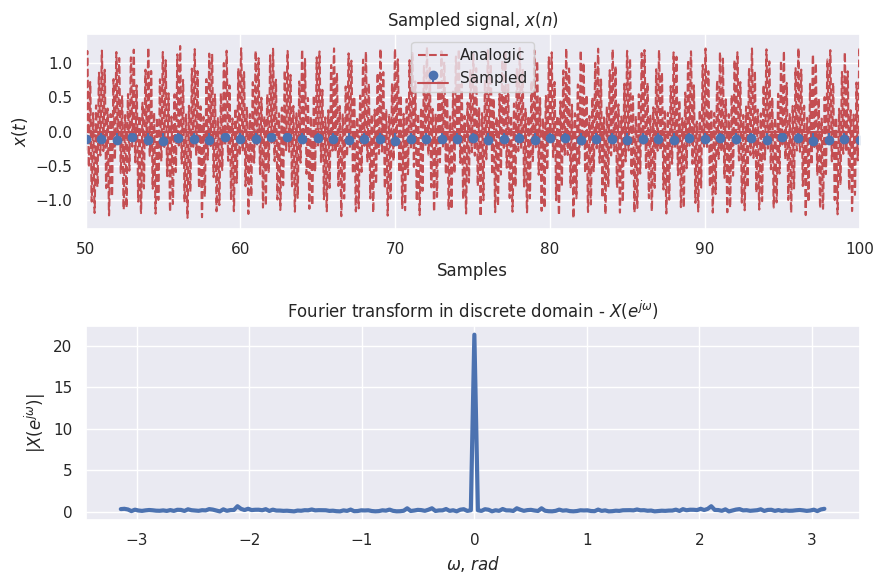

In [16]:
L = 10

# Low-pass filter
w_c = 2*np.pi*f_s/(2*L)
filt = w_c**2 / ((w_c**2 - (2*np.pi*f_sampled)**2) +1j*np.sqrt(2)*w_c*2*np.pi*f_sampled)

Xf_filt = Xf_sampled*filt
xn_filt = ifft(ifftshift(Xf_filt))
# Defining sampling arrays
t_decimated = np.arange(0, int(t_sampled.size/L))
x_decimated = np.zeros(t_decimated.size)

# Sampling
for i in range(x_decimated.size):
    x_decimated[i] = xn_filt.real[int(i*L)]
#     t_decimated[i] = t_sampled[int(i*L)]
plt.figure(figsize=(9,6))


plt.subplot(2,1,1)
plt.plot(t*f_s/L, xt_filtered, '--r')
plt.stem(t_decimated, x_decimated)
plt.title("Sampled signal, $x(n)$")
plt.xlabel("Samples")
plt.ylabel("$x(t)$")
plt.legend(['Analogic', 'Sampled'])
# Only shows two periods
plt.xlim(50, 100)

# Frequency domain
plt.subplot(2,1,2)

Xf_decimated = fftshift(fft(x_decimated))
f_decimated = fftshift(fftfreq(t_decimated.size, 1/f_s))

plt.plot(f_decimated*2*np.pi/f_s, np.abs(Xf_decimated), linewidth=3)
plt.grid("on", which="both")
# plt.xlim(-2*f_s/2, 2*f_s/2)
plt.title("Fourier transform in discrete domain - $X(e^{j\omega})$")
plt.xlabel("$\omega$, $rad$")
plt.ylabel("$|X(e^{j\omega})|$")

plt.tight_layout()
plt.show()


The maximum alteration occurs here. The lesser frequencies are lost. the component located in $\omega = 0rad$ is the component that was in $f = 600Hz$. Now it is at $f^{'} = 6000Hz$ and it's equivalent to $\omega = 2\pi = 0rad$. the signal now has lost all frequencies, and the recovered one would be a DC signal

***
## Interpolation
***

Interpolation is equivalent to insert samples in signal. First, we are inserting $0s$ in the new samples. Then, we will apply a los-pass filter to complete the interpolation. 
<center>\begin{equation}
    x_i(n) = 
    \begin{cases}
      x(n/M), n \ multiple \ of \ M\\
      0, c.c
    \end{cases}\,.
\end{equation}</center>

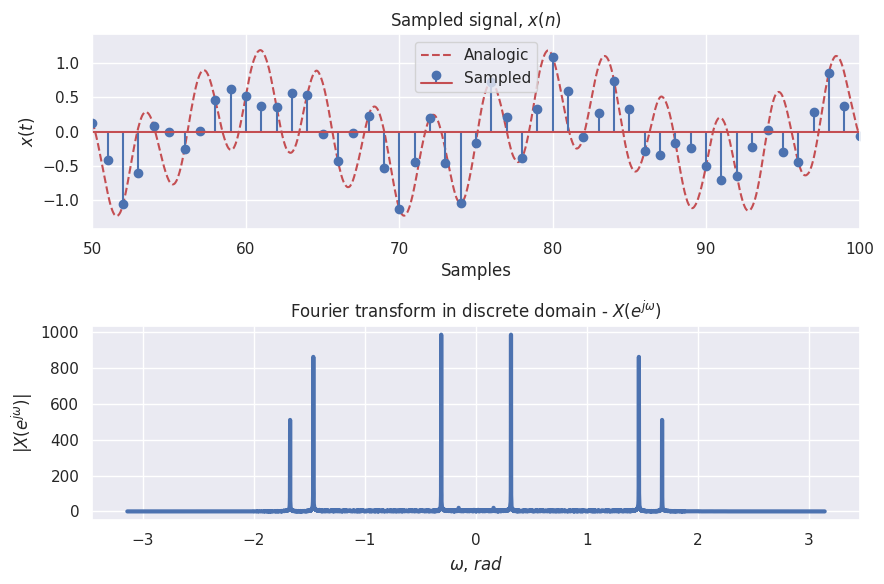

In [17]:
M = 2

# I will use the interpolate function from scipy.
interp = interpolate.interp1d(t_sampled, xn.real, kind='cubic')
t_interp = np.arange(0, t.size/(analog_fs/f_s)-1, 1/M)
x_interp = interp(t_interp)

plt.figure(figsize=(9,6))


plt.subplot(2,1,1)
plt.plot(t*f_s*M, xt_filtered, '--r')
plt.stem(t_interp*M, x_interp)
plt.title("Sampled signal, $x(n)$")
plt.xlabel("Samples")
plt.ylabel("$x(t)$")
plt.legend(['Analogic', 'Sampled'])
# Only shows two periods
plt.xlim(50, 100)
# Frequency domain

plt.subplot(2,1,2)

Xf_interpolated = fftshift(fft(x_interp))
f_interpolated = fftshift(fftfreq(t_interp.size, 1/f_s))

plt.plot(f_interpolated*2*np.pi/f_s, np.abs(Xf_interpolated), linewidth=3)
plt.grid("on", which="both")
# plt.xlim(-f_s/6, f_s/6)
plt.title("Fourier transform in discrete domain - $X(e^{j\omega})$")
plt.xlabel("$\omega$, $rad$")
plt.ylabel("$|X(e^{j\omega})|$")

plt.tight_layout()
plt.show()

In this case, the spectrum is compressed. Now we can see that in the interval of $[-\pi, \pi]$, there is two copies of the spectrum. 

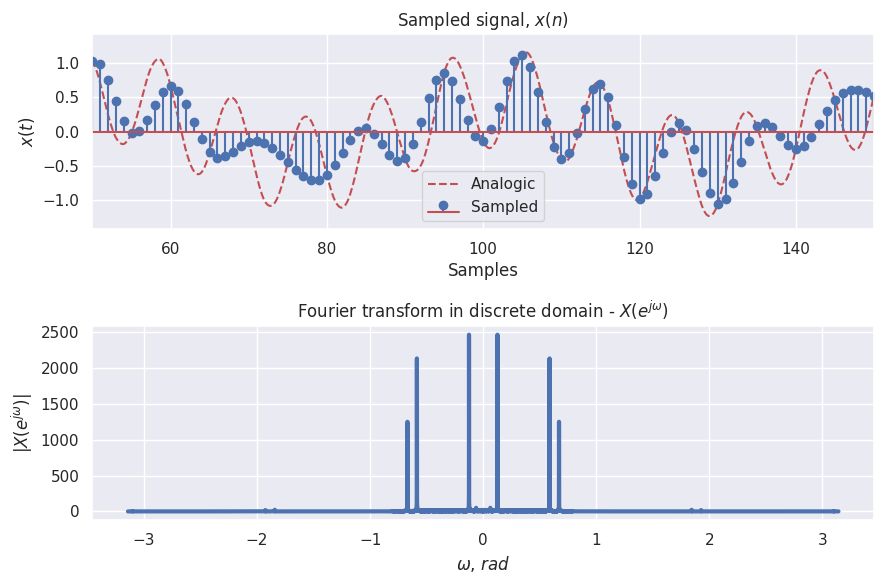

In [18]:
M = 5

# I will use the interpolate function from scipy.
interp = interpolate.interp1d(t_sampled, xn.real, kind='cubic')
t_interp = np.arange(0, t.size/(analog_fs/f_s)-1, 1/M)
x_interp = interp(t_interp)

plt.figure(figsize=(9,6))


plt.subplot(2,1,1)
plt.plot(t*f_s*M, xt_filtered, '--r')
plt.stem(t_interp*M, x_interp)
plt.title("Sampled signal, $x(n)$")
plt.xlabel("Samples")
plt.ylabel("$x(t)$")
plt.legend(['Analogic', 'Sampled'])
# Only shows two periods
plt.xlim(50, 150)
# Frequency domain

plt.subplot(2,1,2)

Xf_interpolated = fftshift(fft(x_interp))
f_interpolated = fftshift(fftfreq(t_interp.size, 1/f_s))

plt.plot(f_interpolated*2*np.pi/f_s, np.abs(Xf_interpolated), linewidth=3)
plt.grid("on", which="both")
# plt.xlim(-f_s/6, f_s/6)
plt.title("Fourier transform in discrete domain - $X(e^{j\omega})$")
plt.xlabel("$\omega$, $rad$")
plt.ylabel("$|X(e^{j\omega})|$")

plt.tight_layout()
plt.show()

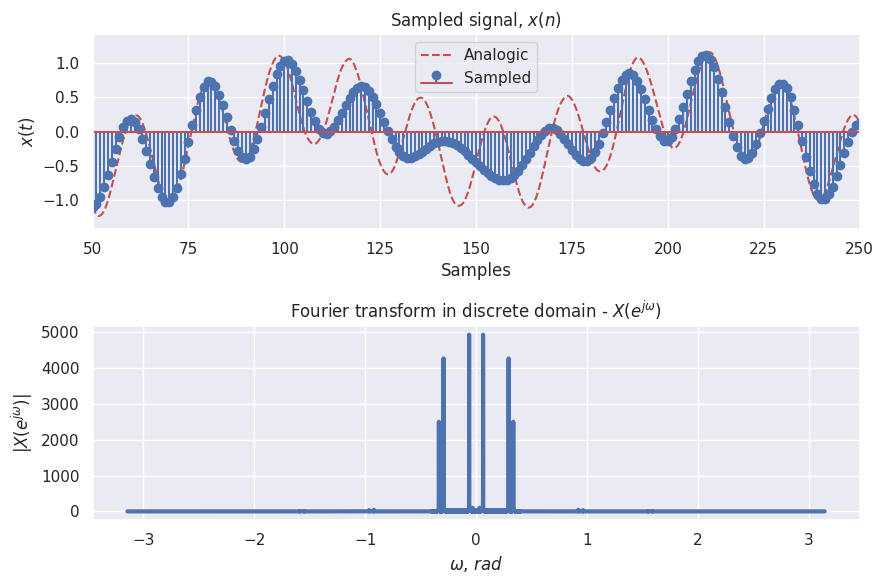

In [19]:
M = 10

# I will use the interpolate function from scipy.
interp = interpolate.interp1d(t_sampled, xn.real, kind='cubic')
t_interp = np.arange(0, t.size/(analog_fs/f_s)-1, 1/M)
x_interp = interp(t_interp)

plt.figure(figsize=(9,6))


plt.subplot(2,1,1)
plt.plot(t*f_s*M, xt_filtered, '--r')
plt.stem(t_interp*M, x_interp)
plt.title("Sampled signal, $x(n)$")
plt.xlabel("Samples")
plt.ylabel("$x(t)$")
plt.legend(['Analogic', 'Sampled'])
# Only shows two periods
plt.xlim(50, 250)
# Frequency domain

plt.subplot(2,1,2)

Xf_interpolated = fftshift(fft(x_interp))
f_interpolated = fftshift(fftfreq(t_interp.size, 1/f_s))

plt.plot(f_interpolated*2*np.pi/f_s, np.abs(Xf_interpolated), linewidth=3)
plt.grid("on", which="both")
# plt.xlim(-f_s/6, f_s/6)
plt.title("Fourier transform in discrete domain - $X(e^{j\omega})$")
plt.xlabel("$\omega$, $rad$")
plt.ylabel("$|X(e^{j\omega})|$")

plt.tight_layout()
plt.show()

We can observe that interpolate is equivalent to comprime the spectrum. With bigger $M$, more comprimed (And more expanded in time). We must be aware when recovering an interpolated or an decimated signal. We must use the sampling frequency after the process. If we use the old sampling frequency , the recovered signal will be comprimed int time (decimation case) or expanded in time (interpolation case).

***
## Quantization
***

Let's consider the following quantization scenario:

### Atmega328p

Parameters of ADC:
* Max sampling frequency: $15ksps$
* Resolution: $10bits$

the atmega328p doesn't have an AA filter. So I will utilizate the AA-filter implemented at the beginning of this notebook and I will manipulated the `xt_filtered` signal. Once the analogRead of Arduino reads between 0 to 5V, I will add a DC component to the signal, because it has negative values. I will also amplify the signal to reduce the error of quantization and to utilize the range of ADC. Let's do it first

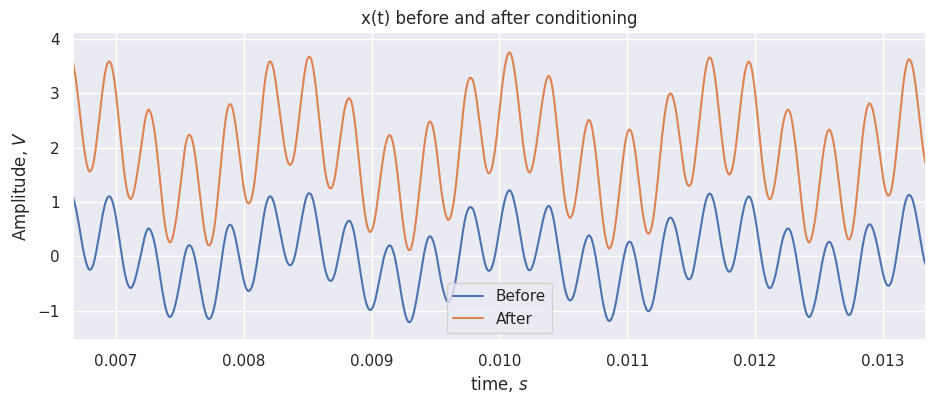

In [20]:
xt_with_dc = 1.5*(xt_filtered + np.abs(np.min(xt_filtered)))
plt.figure(figsize=(11,4))

plt.plot(t, xt_filtered)
plt.plot(t, xt_with_dc)
plt.xlim(2/f_1, 4/f_1)
plt.xlabel('time, $s$')
plt.ylabel('Amplitude, $V$')
plt.title('x(t) before and after conditioning')
plt.legend(['Before', 'After'])

plt.show()

Now, let's configurate the sample-hold part of ADC. I will use the maximum sampling frequency. $f_s = 15ksps$. This is enough to sample this signal ($f_s \gt 2f_x = 6.4ksps$)

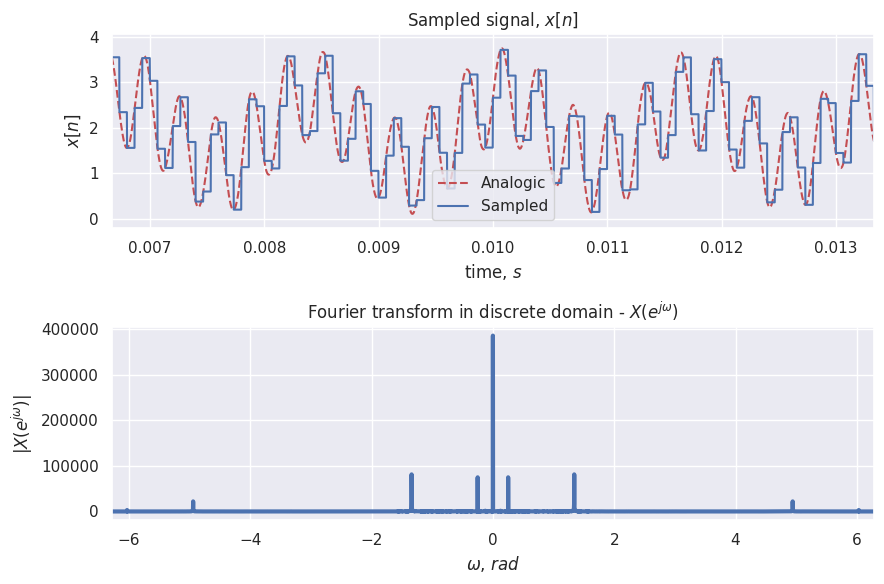

In [21]:
f_s = 15e3 #sps


# Defining sampling arrays
xn = np.zeros(t.size)

# Sampling
for i in range(xn.size):
    if(i%((analog_fs)/f_s) == 0):
        xn[i] = xt_with_dc.real[i]
    else:
        xn[i] = xn[i-1]

# Plotting sampled signal and spectrum

plt.figure(figsize=(9,6))
plt.subplot(2,1,1)
plt.plot(t, xt_with_dc, '--r')
plt.plot(t, xn)
plt.title("Sampled signal, $x[n]$")
plt.xlabel("time, $s$")
plt.ylabel("$x[n]$")
plt.legend(['Analogic', 'Sampled'])
# Only shows two periods
plt.xlim(2/f_1, 4/f_1)

# Frequency domain
plt.subplot(2,1,2)

Xf_sampled = fftshift(fft(xn, t.size))
f_sampled = fftshift(fftfreq(t.size, t[1]-t[0]))

plt.plot(f_sampled*2*np.pi/f_s, np.abs(Xf_sampled), linewidth=3)
plt.grid("on", which="both")
plt.title("Fourier transform in discrete domain - $X(e^{j\omega})$")
plt.xlabel("$\omega$, $rad$")
plt.ylabel("$|X(e^{j\omega})|$")
plt.xlim(-2*np.pi, 2*np.pi)

plt.tight_layout()
plt.show()

We can see the DC component. Now, let's quantize this signal. To do this, I will capture the value of sampled signal every $T_s$ seconds. Then, the quantization will be performed. Before quantizing, first I will calculate the division of quantizer:

In [22]:
N = 10 #bits
qnt_interval = 5/(2**10)
print(f'Quantization interval: {qnt_interval}V')

Quantization interval: 0.0048828125V


In order to quantize, I will take the analogic value of $x[n]$ and divide by `qnt_interval`, rouding the result. the minimum value will be $0$, and the maximum value will be $1023$.

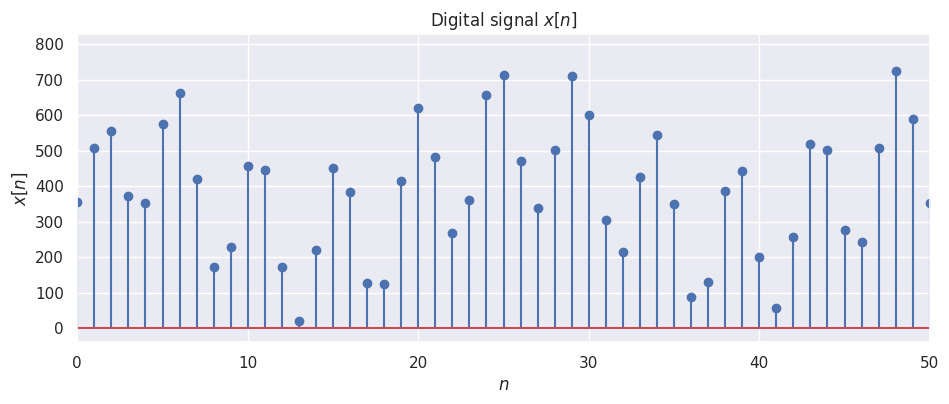

In [23]:
xn_digital = np.zeros(int(xn.size/(analog_fs/f_s)))
t_digital = np.arange(xn_digital.size)

for i in range(xn.size):
    if(i%((analog_fs)/f_s) == 0):
        xn_digital[int(i/(analog_fs/f_s))] = np.round(xn[i]/qnt_interval)

        
plt.figure(figsize=(11,4))
plt.stem(t_digital, xn_digital)
plt.xlim(0, 50)
plt.title('Digital signal $x[n]$')
plt.xlabel('$n$')
plt.ylabel('$x[n]$')

plt.show()



In order to transmit this signal through a given channel, this channel must have a minimum bandwidth of $Nf_s = 10\times 15000 = 150kbps$.